Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.  It shares the same image size and structure of training and testing splits.

- ## Try to build a classifier for the Fashion-MNIST dataset that achieves over 93.5% accuracy on the test set. It is possible to get over 94%. I got 94.1%.
- ## Use convnet for the purpose. Focus on the following
    - ### Learn how to use padding in convnet.
    - ### Learn how to use Batch Normalization and Dropout to fight overfitting.
    - ### Learn how to use nadam optimizer.
- ## Part of function build_model() is given. Add more layers to achieve our goal. That is the only part we need to change.
- ## Use test data set only once.
- ## The grade is calculated as max(0, min((test accuracy - 0.92)/(0.935 - 0.92), 1))*100

In [0]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [0]:
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('', kind='train')
X_test, y_test = mnist_reader.load_mnist('', kind='t10k')

In [3]:
X_train.shape

(60000, 784)

In [4]:
y_train.shape

(60000,)

In [5]:
y_test.shape

(10000,)

### Labels
Each training and test example is assigned to one of the following labels:

Label	Description
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

In [0]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

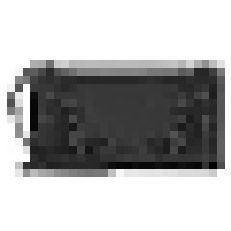

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X_train[36001]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off");

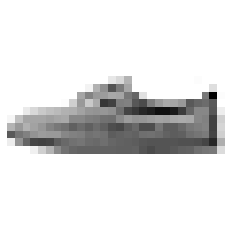

In [8]:
plot_digit(X_train[40000])

In [0]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

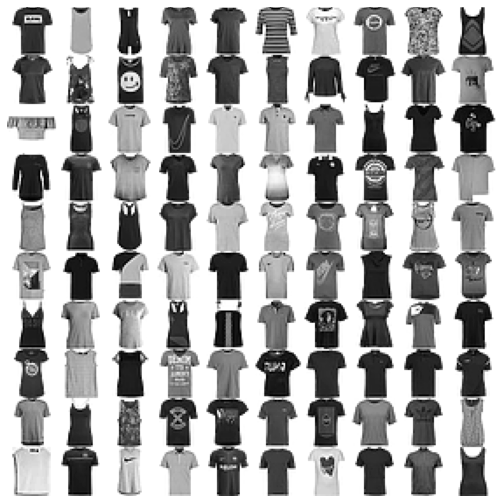

In [10]:
plt.figure(figsize=(9,9))
X_0 = X_train[(y_train == 0)]
example_images = X_0[:100]
plot_digits(example_images, images_per_row=10)

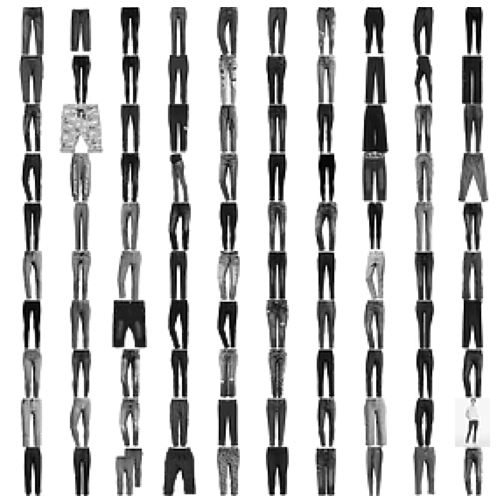

In [11]:
plt.figure(figsize=(9,9))
X_1 = X_train[(y_train == 1)]
example_images = X_1[:100]
plot_digits(example_images, images_per_row=10)

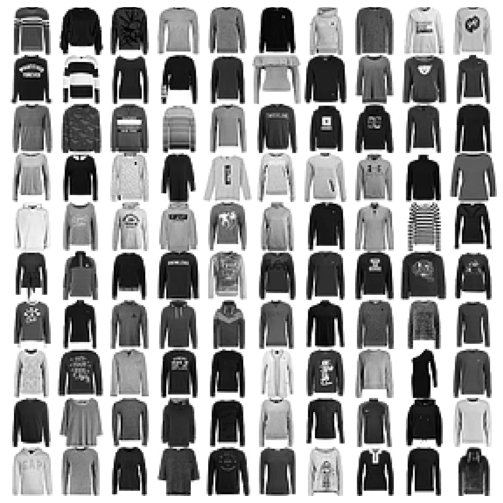

In [12]:
plt.figure(figsize=(9,9))
X_2 = X_train[(y_train == 2)]
example_images = X_2[:100]
plot_digits(example_images, images_per_row=10)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    # add layers here 
    
    # Convolution Layer #3 
    model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
    model.add(layers.BatchNormalization())
    # Pool Layer #2
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    # Dropout Layer #3
    model.add(layers.Dropout(0.5))
    
    # add layers here
    model.add(layers.Dense(1024, activation='relu', kernel_initializer="he_uniform"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(10, activation='softmax'))
    return model
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9

In [0]:
from tensorflow.keras.utils import to_categorical

X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255
y_train = to_categorical(y_train)

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255
y_test = to_categorical(y_test)

X_val = X_train[:10000]
y_val = y_train[:10000]

X_train_partial = X_train[10000:]
y_train_partial = y_train[10000:]

In [15]:
X_train_partial.shape, y_train_partial.shape, X_test.shape, y_test.shape

((50000, 28, 28, 1), (50000, 10), (10000, 28, 28, 1), (10000, 10))

In [16]:
model.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train_partial, y_train_partial, epochs=40, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/40
782/782 [==============================] - 6s 8ms/step - loss: 0.5024 - accuracy: 0.8245 - val_loss: 0.3332 - val_accuracy: 0.8775
Epoch 2/40
782/782 [==============================] - 6s 8ms/step - loss: 0.3339 - accuracy: 0.8772 - val_loss: 0.4098 - val_accuracy: 0.8434
Epoch 3/40
782/782 [==============================] - 6s 8ms/step - loss: 0.2874 - accuracy: 0.8941 - val_loss: 0.2414 - val_accuracy: 0.9092
Epoch 4/40
782/782 [==============================] - 6s 8ms/step - loss: 0.2607 - accuracy: 0.9050 - val_loss: 0.2277 - val_accuracy: 0.9145
Epoch 5/40
782/782 [==============================] - 6s 8ms/step - loss: 0.2408 - accuracy: 0.9114 - val_loss: 0.3351 - val_accuracy: 0.8825
Epoch 6/40
782/782 [==============================] - 6s 8ms/step - loss: 0.2265 - accuracy: 0.9156 - val_loss: 0.2080 - val_accuracy: 0.9231
Epoch 7/40
782/782 [==============================] - 6s 8ms/step - loss: 0.2110 - accuracy: 0.9216 - val_loss: 0.1928 - val_accuracy: 0.9301
Epoch 

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

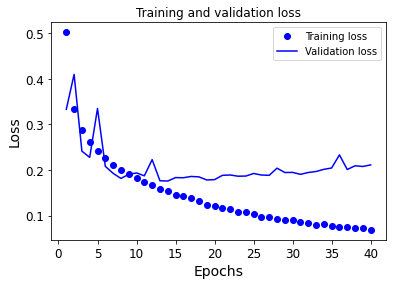

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

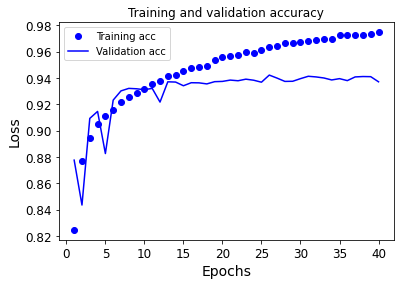

In [19]:
plt.clf()   # clear figure
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
model = build_model()
model.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=40, batch_size=64)

Epoch 1/40
938/938 [==============================] - 7s 7ms/step - loss: 0.4800 - accuracy: 0.8329
Epoch 2/40
938/938 [==============================] - 7s 7ms/step - loss: 0.3187 - accuracy: 0.8832
Epoch 3/40
938/938 [==============================] - 7s 7ms/step - loss: 0.2769 - accuracy: 0.8961
Epoch 4/40
938/938 [==============================] - 7s 7ms/step - loss: 0.2525 - accuracy: 0.9067
Epoch 5/40
938/938 [==============================] - 7s 7ms/step - loss: 0.2335 - accuracy: 0.9140
Epoch 6/40
938/938 [==============================] - 7s 7ms/step - loss: 0.2196 - accuracy: 0.9192
Epoch 7/40
938/938 [==============================] - 7s 7ms/step - loss: 0.2078 - accuracy: 0.9222
Epoch 8/40
938/938 [==============================] - 7s 7ms/step - loss: 0.1952 - accuracy: 0.9275
Epoch 9/40
938/938 [==============================] - 7s 7ms/step - loss: 0.1853 - accuracy: 0.9301
Epoch 10/40
938/938 [==============================] - 7s 7ms/step - loss: 0.1769 - accuracy: 0.9339

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2235 - accuracy: 0.9418


[0.22349470853805542, 0.9417999982833862]

In [22]:
acc = model.evaluate(X_test, y_test)
grade = max(0, min((acc[1] - 0.92)/(0.935 - 0.92), 1))*100
print(grade)

313/313 [==============================] - 1s 3ms/step - loss: 0.2235 - accuracy: 0.9418
100


In [23]:
print("The grade is ", grade)

The grade is  100


***We produced a model that was able to perform at 94.18% on the test set, but if we observe the "Training and Validation Loss" curves, along with the "Training and Validation accuracy" curves, we can very obviously see that the model is still over fitting to the training set, as both validation curves stray away from both training curves as the epochs increase. Perhaps more Dropout layers could help increase the performance even more.***